

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>






<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

In [2]:
#Importando as bibliotecas necessárias:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Realizando a importação dos arquivos:

df_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
df_locations = pd.read_csv("/datasets/project_sql_result_04.csv")


In [4]:
#Estudando dos dados que contém nos arquivos:

print("\nResumo dos dados de empresas de táxi:")
print(df_trips.info())
print(df_trips.describe())
print("\nResumo dos dados de bairros de destino:")
print(df_locations.info())
print(df_locations.describe())


Resumo dos dados de empresas de táxi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Resumo dos dados de bairros de destino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean  

In [5]:
#Verificando se os tipos de dados estão corretos:

df_trips["trips_amount"] = pd.to_numeric(df_trips["trips_amount"], errors='coerce')
df_locations["average_trips"] = pd.to_numeric(df_locations["average_trips"], errors='coerce')


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>




In [6]:
# Identificando os 10 principais bairros em termos de destinos:

top_10_bairros = df_locations.nlargest(10, "average_trips")
print(top_10_bairros)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


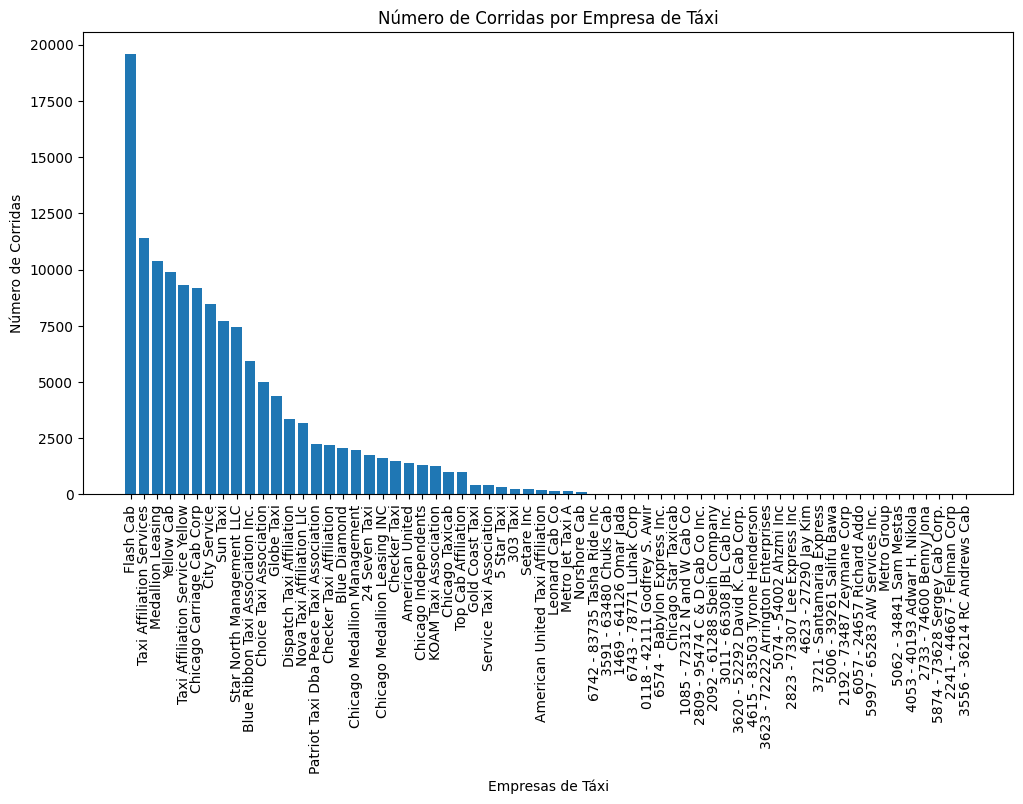

In [7]:
#Gráfico das Empresas de táxi e número de corridas:

plt.figure(figsize=(12, 6))
df_trips_sorted = df_trips.sort_values(by="trips_amount", ascending=False)
plt.bar(df_trips_sorted["company_name"], df_trips_sorted["trips_amount"])
plt.xticks(rotation=90)
plt.xlabel("Empresas de Táxi")
plt.ylabel("Número de Corridas")
plt.title("Número de Corridas por Empresa de Táxi")
plt.show()

Conclusões sobre o Gráfico das Empresas de táxi e número de corridas:

Algumas empresas de táxi dominam o mercado, realizando um grande número de corridas. A Flash Cab é a empresa que lidera o número de corridas.

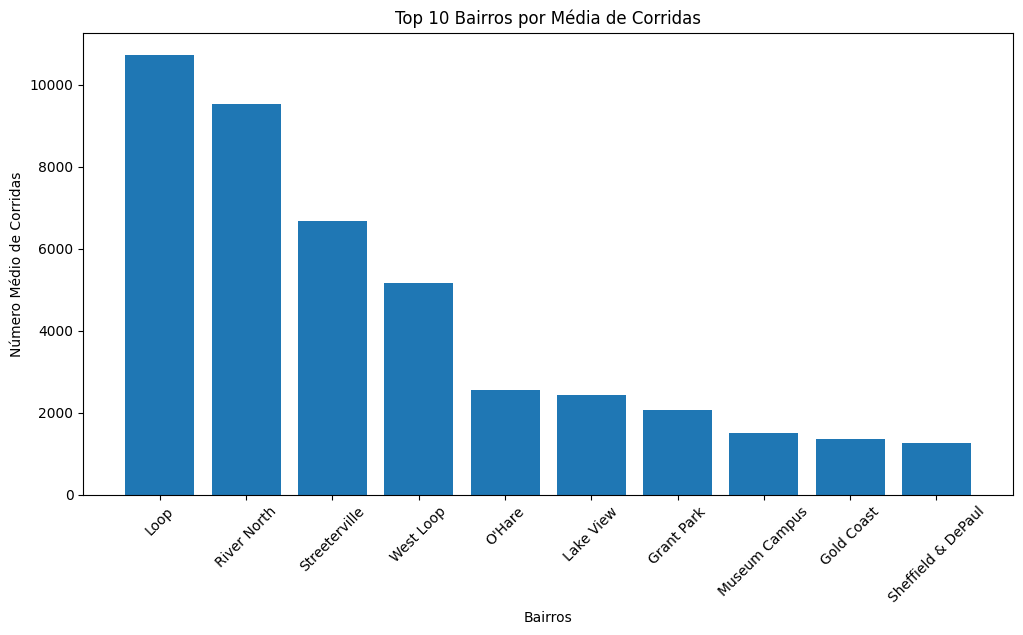

In [8]:
#Grafico dos Top 10 bairros por número de corridas:
plt.figure(figsize=(12, 6))
plt.bar(top_10_bairros["dropoff_location_name"], top_10_bairros["average_trips"])
plt.xticks(rotation=45)
plt.xlabel("Bairros")
plt.ylabel("Número Médio de Corridas")
plt.title("Top 10 Bairros por Média de Corridas")
plt.show()

Conclusões:
Os bairros mais movimentados são Loop e River North, indicando alta demanda nessas áreas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ambas as visualizações foram implementadas conforme o solicitado e permitem ver com clareza os itens que se destacam em cada uma das dimensões.
</div>


Teste de hipóteses:

Todos os passos a partir daqui serão com o objetivo de realizar o teste de hipoteses. 
Primeiramente, vamos importar e ler o arquivo e ler as primeiras linhas.
Em seguida, realizar o tratamento necessario dos dados para filtrar as corridas que ocorrerão aos sabados e realizar o teste de hipotese (teste t de student).

In [9]:
#Lendo o arquivo:
df_trips_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")

df_trips_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [10]:
# Convertendo start_ts para datetime:
df_trips_ohare["start_ts"] = pd.to_datetime(df_trips_ohare["start_ts"])

# Verificar valores únicos na coluna 'weather_conditions'
unique_weather_conditions = df_trips_ohare["weather_conditions"].unique()

# Exibir os valores únicos para analisar possíveis problemas no filtro
unique_weather_conditions


array(['Good', 'Bad'], dtype=object)

A coluna weather_conditions contém os valores "Good" e "Bad", em vez de "Rainy". O filtro para identificar sábados chuvosos estava errado porque usava um termo que não existe nos dados. 
Considerando "Good" e "Bad" como paremetros para realizar o filtro e aplicar os testes estatisticos:

In [15]:
# Adicionando uma coluna de dia da semana:
df_trips_ohare["weekday"] = df_trips_ohare["start_ts"].dt.day_name()

# Filtrando somente os sábados
df_saturdays = df_trips_ohare[df_trips_ohare["weekday"] == "Saturday"]

# Separando os dados entre sábados "Bad" e "Good":
bad_weather_saturdays = df_saturdays[df_saturdays["weather_conditions"] == "Bad"]["duration_seconds"]
good_weather_saturdays = df_saturdays[df_saturdays["weather_conditions"] == "Good"]["duration_seconds"]

# Verificando a quantidade de sábados "Bad" e "Good":
count_bad_weather_saturdays = bad_weather_saturdays.count()
count_good_weather_saturdays = good_weather_saturdays.count()

print(bad_weather_saturdays.count())
print(good_weather_saturdays.count())

180
888


Após aplicar o filtro de "Good" e "Bad" temos 180 sábados chuvosos e 888 sábados com o clima bom.
Dessa forma, podemos partir para os testes de Hipotéses:

Teste escolhidos: t Student
Motivo: Estamos comparando duas amostras separadas (corridas em sábados chuvosos e sábados não chuvosos).Além disso, as amostras são razoavelmente grandes. Com isso, o teste t ajudará a avaliar se a diferença entre as médias é significativa.

Hipoteses:
Hipótese nula (H0): A duração média das corridas do Loop para o Aeroporto O'Hare não muda nos sábados chuvosos.
Hipótese alternativa (H1): A duração média das corridas do Loop para o Aeroporto O'Hare muda nos sábados chuvosos.

Nivel de significância escolhido: p-valor = 0,05.


In [16]:
# Executar teste t de Student para comparar as médias
alpha = 0.05  # Nível de significância de 5%
t_stat, p_value = stats.ttest_ind(bad_weather_saturdays, good_weather_saturdays, equal_var=False, nan_policy='omit')

# Exibir resultados
count_bad_weather_saturdays, count_good_weather_saturdays, bad_weather_saturdays.mean(), good_weather_saturdays.mean(), t_stat, p_value

(180,
 888,
 2427.2055555555557,
 1999.6756756756756,
 7.186034288068629,
 6.738994326108734e-12)

Os resultados do teste de hipótese mostram que:

Número de corridas aos sábados com condições ruins: 180
Número de corridas aos sábados com condições boas: 888
Duração média das corridas aos sábados chuvosos: 2.427 segundos 
Duração média das corridas aos sábados sem chuva: 1.999 segundos 
Valor-p: 6,74 × 10⁻¹² < 0,05

Como p-valor < 0,05, rejeitamos a hipótese nula.
Dessa forma, com base no teste podemos afirmar que existe grande diferença na duração das corridas entre sábados chuvosos e sábados não chuvosos.A duração média das corridas nos sábados chuvosos é consideravelmente maior do que nos sábados sem chuva.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Taina, na realidade há um problema com a forma que você realizou a filtragem que está levando a selecionar uma amostra nula. Peço que revise os filtros para que o teste possa ser realizado.
    
NEsse sentido seria bem legal que formulasse com detalhes as hipóteses sendo testadas.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito, Taina, agora o teste está 100%
</div>